# Multi Class Classification

Working on **Digits Classifier** using logistic Regression

In [1]:
from sklearn.datasets import load_digits
# https://scikit-learn.org/1.5/auto_examples/datasets/plot_digits_last_image.html

In [2]:
digits = load_digits()

In [4]:
dir(digits)  #digits contain the images, numerics ect...

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [21]:
digits.DESCR  #description

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 1797\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

In [16]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [5]:
import matplotlib.pyplot as plt

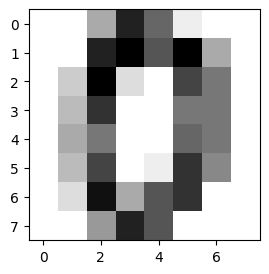

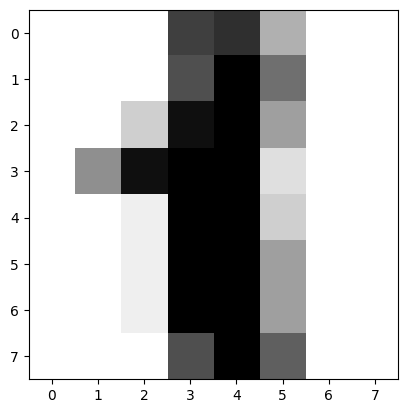

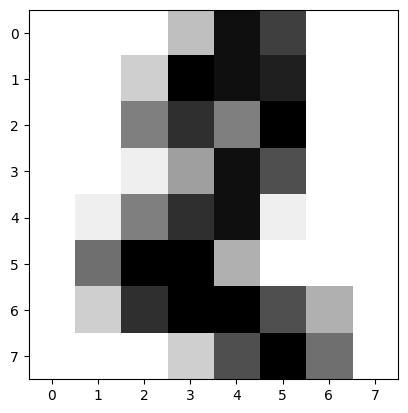

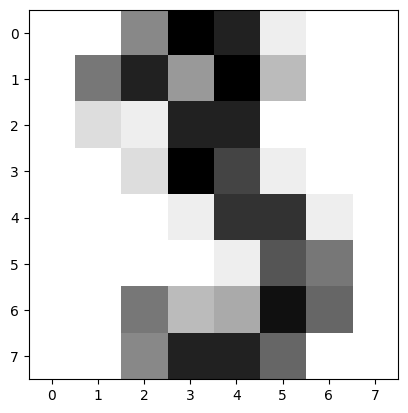

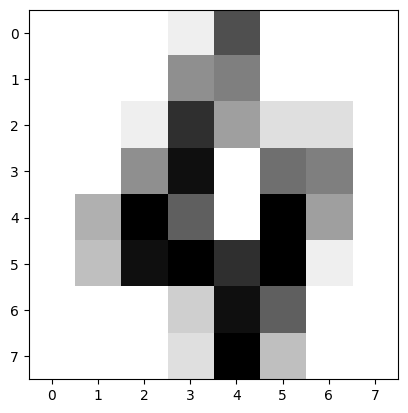

In [11]:
# Display the last digit
plt.figure(1, figsize=(3, 3))
for i in range(5):
    plt.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation="nearest")
    plt.show()

In [25]:
digits.feature_names[0:5]

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4']

In [31]:
print(digits.frame)

None


In [17]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [18]:
digits.target_names[0:5]

array([0, 1, 2, 3, 4])

In [46]:
# for the Train the model to get the multiclass classification

x = digits.data
y = digits.target

In [32]:
from sklearn.model_selection import train_test_split

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [49]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(x_test))

1437
360
1437
360


In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
model = LogisticRegression()

In [52]:
model.fit(x_train,y_train)

C:\Users\prave\anaconda3\envs\tensorFlow\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
model.score(x_train,y_train)

1.0

In [54]:
y_pred = model.predict(x_test)


In [57]:
import pandas as pd

pd.DataFrame({'acural':y_test,'predicted':y_pred})

,acural,predicted
0,1,1
1,7,7
2,5,5
3,0,0
4,9,9
...,...,...
355,7,9
356,5,5
357,8,8
358,7,7


In [58]:
from sklearn.metrics import r2_score,accuracy_score

In [59]:
print(r2_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

0.9441237848425252
0.975


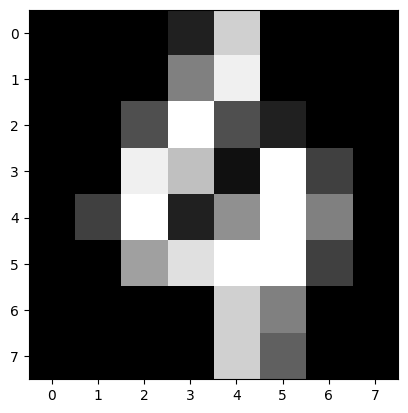

In [66]:
# plt.gray()
plt.imshow(digits.images[100])

In [68]:
digits.target[100]

4

In [76]:
model.predict([digits.data[100]])  #the input should be in the numerical i.e the data of the images

array([4])

In [79]:
from sklearn.metrics import confusion_matrix

In [87]:
con_mat = confusion_matrix(y_test,y_pred)
con_mat

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 38,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 38,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 40,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  1,  1, 38,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 38,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 33,  0,  1],
       [ 1,  0,  0,  0,  0,  0,  0,  0, 28,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 32]], dtype=int64)

In [92]:
pip install seaborn -q

Note: you may need to restart the kernel to use updated packages.


Text(95.72222222222221, 0.5, 'predicted')

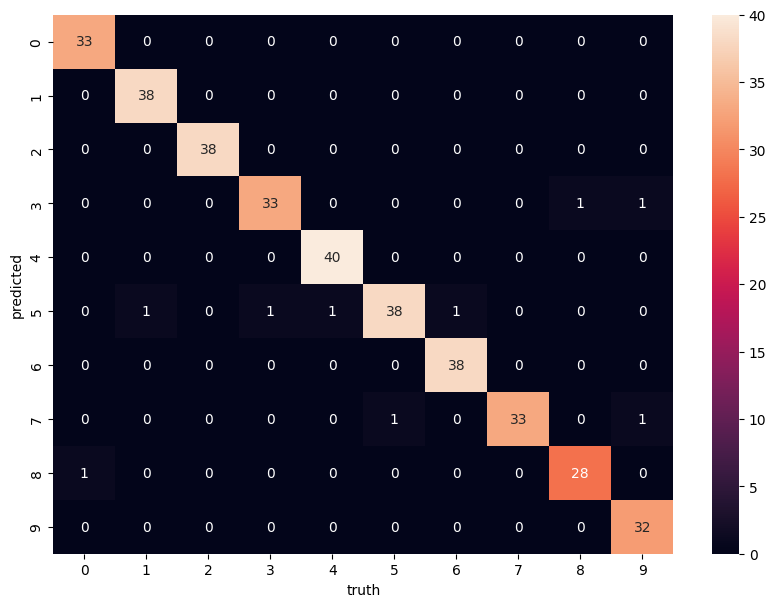

In [95]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(con_mat,annot=True)
plt.xlabel('truth')
plt.ylabel('predicted')